In [5]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import requests
from StringIO import StringIO
from __future__ import division

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [7]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

source = requests.get(url).text

poll_data = StringIO(source)

In [8]:
poll_df = pd.read_csv(poll_data)

In [10]:
poll_df.info

<bound method DataFrame.info of                                 Pollster  Start Date    End Date  \
0              Politico/GWU/Battleground  2012-11-04  2012-11-05   
1                       Gravis Marketing  2012-11-03  2012-11-05   
2                               IBD/TIPP  2012-11-03  2012-11-05   
3                   JZ Analytics/Newsmax  2012-11-03  2012-11-05   
4                              Rasmussen  2012-11-03  2012-11-05   
5                             UPI/CVOTER  2012-11-03  2012-11-05   
6                       YouGov/Economist  2012-11-03  2012-11-05   
7                    Ipsos/Reuters (Web)  2012-11-01  2012-11-05   
8                                    ARG  2012-11-02  2012-11-04   
9                                    CNN  2012-11-02  2012-11-04   
10   PPP (D-Americans United for Change)  2012-11-02  2012-11-04   
11                              ABC/Post  2012-11-01  2012-11-04   
12                 DailyKos/SEIU/PPP (D)  2012-11-01  2012-11-04   
13              

In [11]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47,47,NaN,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48,48,NaN,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
2,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50,49,1.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47,47,NaN,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48,49,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


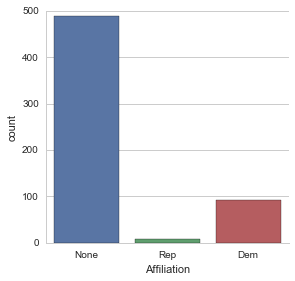

In [12]:
sns.factorplot('Affiliation', data=poll_df, kind='count')

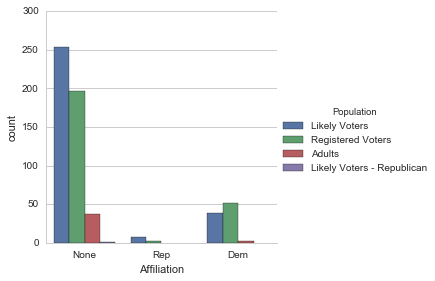

In [13]:
sns.factorplot('Affiliation', data=poll_df, kind='count', hue='Population')

In [14]:
avg = pd.DataFrame(poll_df.mean())

avg.drop('Number of Observations', axis=0, inplace=True)

In [15]:
std = pd.DataFrame(poll_df.std())

std.drop('Number of Observations', axis=0, inplace=True)

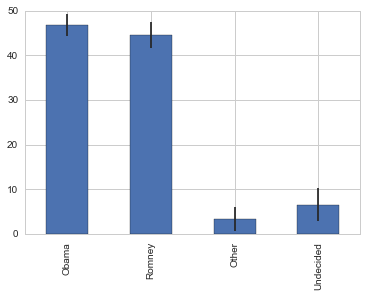

In [16]:
avg.plot(yerr=std, kind='bar', legend=False)

In [19]:
poll_avg = pd.concat( [avg,std], axis=1 )
poll_avg.columns = ['Average','STD']
poll_avg

,Average,STD
Obama,46.774576,2.447069
Romney,44.572881,2.925320
Other,3.400990,2.721318
Undecided,6.546099,3.698614


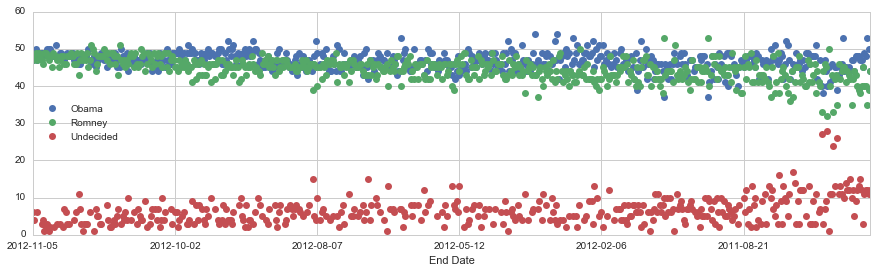

In [21]:
poll_df.plot(x='End Date', y=['Obama','Romney','Undecided'], linestyle='', marker='o', figsize=(15,4))

In [22]:
# cleaner way to visualize the data above.
# create a difference column, and plot that over time (positive or negative for each canditate)

from datetime import datetime

poll_df['Diff'] = (poll_df.Obama - poll_df.Romney)/100

In [24]:
    poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Other,Undecided,Diff
0,2009-03-13,1403.0,44.0,44.0,NaN,12.0,0.00
1,2009-04-17,686.0,50.0,39.0,NaN,11.0,0.11
2,2009-05-14,1000.0,53.0,35.0,NaN,12.0,0.18
3,2009-06-12,638.0,48.0,40.0,NaN,12.0,0.08
4,2009-07-15,577.0,49.0,40.0,NaN,11.0,0.09


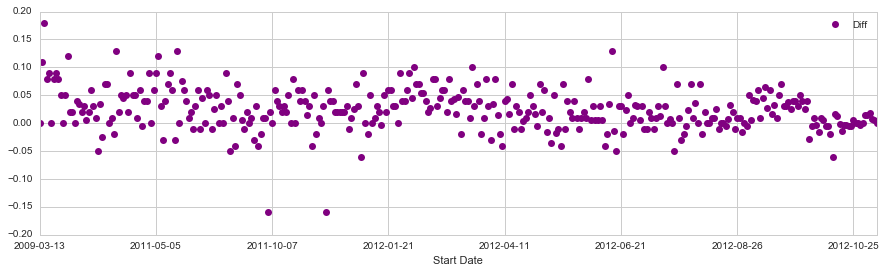

In [26]:
poll_df.plot('Start Date','Diff', figsize=(15,4),marker='o',linestyle='',color='purple')

In [28]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1

print min(xlimit)
print max(xlimit)

329
356


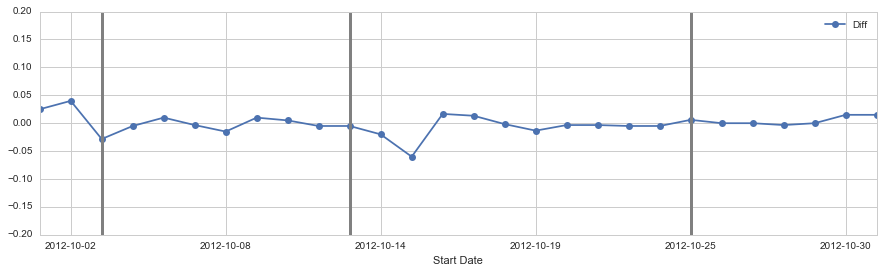

In [42]:
poll_df.plot('Start Date','Diff', figsize=(15,4),marker='o',linestyle='-', xlim=(329,356))

plt.axvline(x=329+2, linewidth=3, color='grey')
plt.axvline(x=329+10, linewidth=3, color='grey')
plt.axvline(x=329+21, linewidth=3, color='grey')